In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Gera N senóides com dispersão de pico dado pelo defasamento angular entre elas

N = 100
t = np.arange(0, 1.5 * np.pi, 0.1)
Dmax = 10.0
dlist = []
for i in range(N):
    D = np.random.uniform(0.2, 1.0) * Dmax
    theta = np.random.uniform(0, 0.6 * np.pi)
    d = D * np.cos(np.pi + t + theta)
    dlist.append(d)
darray = np.array(dlist)

In [3]:
# matriz de 100 linhas e 48 colunas:
# linhas:  representam as cargas (100 cargas)
# colunas: representam pontos no tempo (48 intervelos de tempo)
darray.shape

(100, 48)

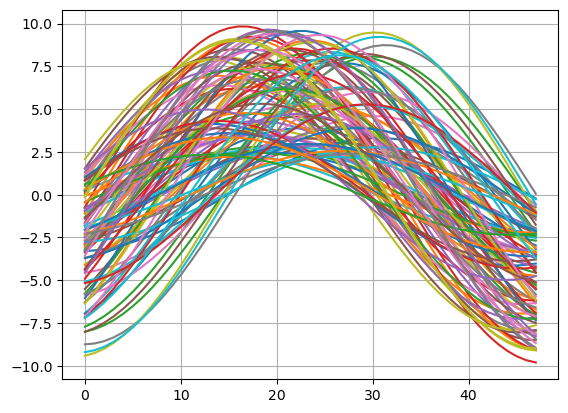

In [4]:
# Plota as curvas de carga

plt.plot(darray.transpose())
plt.grid(True)
# plt.plot(darray.sum(axis=0))
plt.show()

In [5]:
# Demanda máxima diversificada 
dmaxdiv_total = darray.sum(axis=0).max()
dmaxdiv_total

539.9754612653256

In [6]:
# Demanda Máxima não co-incidente
dmaxncon_total = darray.max(axis=1).sum()
dmaxncon_total

615.8329555859474

In [7]:
# cálculo da lista de fatores de diversidade em sequência
fd_list = []
for i in range(0, darray.shape[0]):
    darraysub = darray[0:i + 1, :]
    dmaxdiv = darraysub.sum(axis=0).max() # calculo da demanda diversificada maxima
    dmaxncon = darraysub.max(axis=1).sum() # calculo da demanda diversificada não coincidente
    fd = dmaxncon / dmaxdiv # cálculo do fator de diversidade
    fd_list.append(fd)

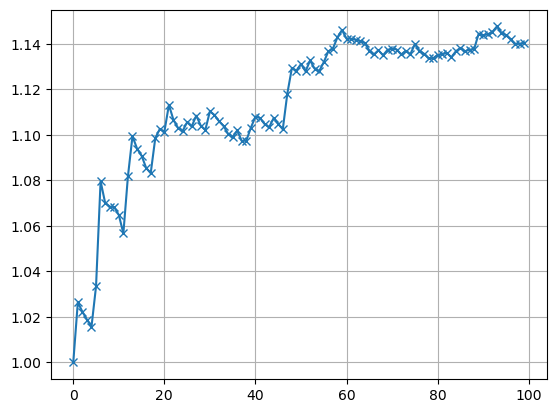

In [8]:
# plotagem dos dados de fator de diversidade
plt.plot(fd_list, 'x-')
plt.grid(True)

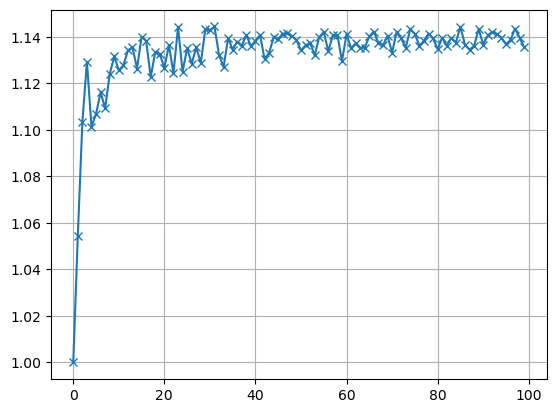

In [9]:
# Cálculo da lista de fatores de diversidade utilizando o processo
# de cálculo por meio de obtenção de média de amostras para cada
# um dos valores da lista de fatores de diversidade.

fd_list = []
for i in range(0, darray.shape[0]):
    samples = []
    sample_number = 40 # número de amostras para cálculo
    
    # processo de amostragem
    for j in range(sample_number):
        sample = darray[np.random.randint(0, darray.shape[0], i+1)]
        samples.append(sample)
    
    # processo de cálculo de média das amostras de FD
    fd_list_parcial = []
    for sample in samples:
        dmaxdiv = sample.sum(axis=0).max() # calculo da demanda diversificada maxima
        dmaxncon = sample.max(axis=1).sum() # calculo da demanda diversificada não coincidente
        fd = dmaxncon / dmaxdiv # cálculo do fator de diversidade
        fd_list_parcial.append(fd)
    fd_list.append(np.array(fd_list_parcial).mean()) # armazenagem da média na lista de FD
    
plt.plot(fd_list, 'x-')
plt.grid(True)